## Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np

## Read synthetic dataset generated previously

In [2]:
df = pd.read_csv("data.csv")
df

,Temperature,Pressure,Current Density,Bubble Coverage,Reversible Voltage,Activation Overpotential,Ohmic Potential,Cell Voltage,Hydrogen Evolution Rate,Oxygen Evolution Rate
0,373,8,0.383838,-0.308736,1.216060,0.349959,0.210651,1.776671,31.825746,15.912873
1,353,4,0.409091,0.140836,1.215879,0.423878,0.303825,1.943582,33.919545,16.959772
2,373,10,0.419192,-0.311398,1.221870,0.356171,0.229950,1.807991,34.757064,17.378532
3,323,6,0.015152,0.138477,1.250195,0.258607,0.016361,1.525162,1.256279,0.628140
4,313,4,0.237374,0.294024,1.249876,0.489298,0.315468,2.054642,19.681711,9.840856
...,...,...,...,...,...,...,...,...,...,...
3955,323,8,0.373737,0.361113,1.256266,0.503837,0.438406,2.198509,30.988226,15.494113
3956,323,4,0.398990,0.371775,1.241598,0.509590,0.470277,2.221464,33.082025,16.541013
3957,373,10,0.080808,-0.190032,1.221870,0.244381,0.045314,1.511566,6.700157,3.350078
3958,313,4,0.085859,0.216715,1.249876,0.411425,0.110864,1.772165,7.118917,3.559458


# Traditional Models

## Splitting Data into training and test dataset (80-20 split)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

X = df.drop(columns=["Hydrogen Evolution Rate"])
y = df["Hydrogen Evolution Rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ridge Regression

In [4]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=100000.0)  
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Regression R² Score: {ridge_r2:.5f}")
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print("Ridge Regression MAE:", ridge_mae)

Ridge Regression R² Score: 0.78025
Ridge Regression MAE: 4.865426223992705


## Lasso Regression

In [5]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=10)  
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso Regression R² Score: {lasso_r2:.5f}")
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print("Lasso Regression MAE:", lasso_mae)

Lasso Regression R² Score: 0.98040
Lasso Regression MAE: 1.4526770142956404


## Elastic Net

In [6]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=20.0, l1_ratio=0.5, max_iter=10000)  # l1_ratio controls mix of L1 and L2
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)
elastic_r2 = r2_score(y_test, elastic_pred)
print("ElasticNet R²:", elastic_r2)
elastic_mae = mean_absolute_error(y_test, elastic_pred)
print("Elastic Net MAE:", elastic_mae)

ElasticNet R²: 0.8923238454262037
Elastic Net MAE: 3.404763473775208


## Decision Tree Regressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    max_depth=4,               
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_r2 = r2_score(y_test, tree_pred)
print("Decision Tree R²:", tree_r2)
tree_mae = mean_absolute_error(y_test, tree_pred)
print("Decision Tree MAE:", tree_mae)

Decision Tree R²: 0.9962381123659747
Decision Tree MAE: 0.6418215516412707


## Random Forest Regressor

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=30,           
    max_depth=3,              
    min_samples_split=10,
    min_samples_leaf=8,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest R²:", rf_r2)
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest MAE:", rf_mae)

Random Forest R²: 0.9883338743459615
Random Forest MAE: 1.1241140354891141


## Gradient Boosting Regressor

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.05,       
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_r2 =  r2_score(y_test, gbr_pred)
print("Gradient Boosting R²:",gbr_r2)
gbr_mae = mean_absolute_error(y_test, gbr_pred)
print("Gradient Boosting MAE:", gbr_mae)

Gradient Boosting R²: 0.9933438738686066
Gradient Boosting MAE: 0.8203445579312411


## XGBoost Regressor

In [10]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=30,
    learning_rate=0.05,
    max_depth=3,
    reg_alpha=10,             
    reg_lambda=10,            
    subsample=0.7,             
    colsample_bytree=0.7,     
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost R²:", xgb_r2)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
print("XGBoost MAE:", xgb_mae)

XGBoost R²: 0.9424729992669875
XGBoost MAE: 2.4170089886366206


## KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(
    n_neighbors=40,        
    weights='uniform'
)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)
print("KNN R²:", knn_r2)
knn_mae = mean_absolute_error(y_test, knn_pred)
print("KNN MAE:", knn_mae)

KNN R²: 0.9913356069625482
KNN MAE: 0.5832763711598702


## SVM

In [12]:
from sklearn.svm import SVR

svm = SVR(
        kernel='rbf',       
        C=0.1,              
        epsilon=1.0         
    )

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_r2 = r2_score(y_test, svm_pred)
print("SVR R²:", svm_r2)
svm_mae = mean_absolute_error(y_test, svm_pred)
print("SVM MAE:", svm_mae)

SVR R²: 0.03124546677136597
SVM MAE: 10.213674979093728


# Deep Learning Algorithms

## MLP

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return self.output(x)

# Model initialization
model = MLPRegressor(input_dim=X_train.shape[1]).to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Data (convert to PyTorch tensors and move to device)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)

# Training loop
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/200], Loss: {loss.item():.4f}")

Epoch [10/200], Loss: 198.3057
Epoch [20/200], Loss: 147.2807
Epoch [30/200], Loss: 132.6079
Epoch [40/200], Loss: 128.8380
Epoch [50/200], Loss: 125.8147
Epoch [60/200], Loss: 122.2999
Epoch [70/200], Loss: 118.3284
Epoch [80/200], Loss: 113.8769
Epoch [90/200], Loss: 108.8711
Epoch [100/200], Loss: 103.2456
Epoch [110/200], Loss: 96.9654
Epoch [120/200], Loss: 90.0008
Epoch [130/200], Loss: 82.3280
Epoch [140/200], Loss: 73.9728
Epoch [150/200], Loss: 65.0128
Epoch [160/200], Loss: 55.5945
Epoch [170/200], Loss: 45.9612
Epoch [180/200], Loss: 36.4469
Epoch [190/200], Loss: 27.4621
Epoch [200/200], Loss: 19.4542


In [14]:
model.eval()  
with torch.no_grad():
    y_train_pred = model(X_train_tensor).cpu().numpy()  
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)  
    y_test_pred = model(X_test_tensor).cpu().numpy() 


train_r2_mlp = r2_score(y_train.values, y_train_pred)
test_r2_mlp = r2_score(y_test.values, y_test_pred)


train_mae_mlp = mean_absolute_error(y_train.values, y_train_pred)
test_mae_mlp = mean_absolute_error(y_test.values, y_test_pred)


print(f"Training R² Score: {train_r2_mlp:.4f}")
print(f"Testing R² Score: {test_r2_mlp:.4f}")
print(f"Training MAE: {train_mae_mlp:.4f}")
print(f"Testing MAE: {test_mae_mlp:.4f}")

Training R² Score: 0.8690
Testing R² Score: 0.8680
Training MAE: 3.7464
Testing MAE: 3.7768


### Using Dropout

In [15]:
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)  
        self.dropout1 = nn.Dropout(0.3)  
        self.layer2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)  
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)  
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)  
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x) 
        x = torch.relu(self.layer3(x))
        return self.output(x)

# Model 
model = MLPRegressor(input_dim=X_train.shape[1]).to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Data 
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)

# Training loop
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/200], Loss: {loss.item():.4f}")

Epoch [10/200], Loss: 174.1632
Epoch [20/200], Loss: 164.6310
Epoch [30/200], Loss: 165.5091
Epoch [40/200], Loss: 157.2901
Epoch [50/200], Loss: 152.6289
Epoch [60/200], Loss: 150.7098
Epoch [70/200], Loss: 148.6706
Epoch [80/200], Loss: 146.8245
Epoch [90/200], Loss: 139.3034
Epoch [100/200], Loss: 138.7299
Epoch [110/200], Loss: 131.4517
Epoch [120/200], Loss: 125.4692
Epoch [130/200], Loss: 114.7198
Epoch [140/200], Loss: 101.7428
Epoch [150/200], Loss: 87.9734
Epoch [160/200], Loss: 66.7979
Epoch [170/200], Loss: 53.0974
Epoch [180/200], Loss: 41.0664
Epoch [190/200], Loss: 33.8884
Epoch [200/200], Loss: 32.0501


In [16]:
model.eval()  
with torch.no_grad():
    y_train_pred = model(X_train_tensor).cpu().numpy()  
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)  
    y_test_pred = model(X_test_tensor).cpu().numpy() 


train_r2_dropout = r2_score(y_train.values, y_train_pred)
test_r2_dropout = r2_score(y_test.values, y_test_pred)


train_mae_dropout = mean_absolute_error(y_train.values, y_train_pred)
test_mae_dropout = mean_absolute_error(y_test.values, y_test_pred)


print(f"Training R² Score: {train_r2_dropout:.4f}")
print(f"Testing R² Score: {test_r2_dropout:.4f}")
print(f"Training MAE: {train_mae_dropout:.4f}")
print(f"Testing MAE: {test_mae_dropout:.4f}")

Training R² Score: 0.9121
Testing R² Score: 0.9117
Training MAE: 3.3257
Testing MAE: 3.3355


# Results

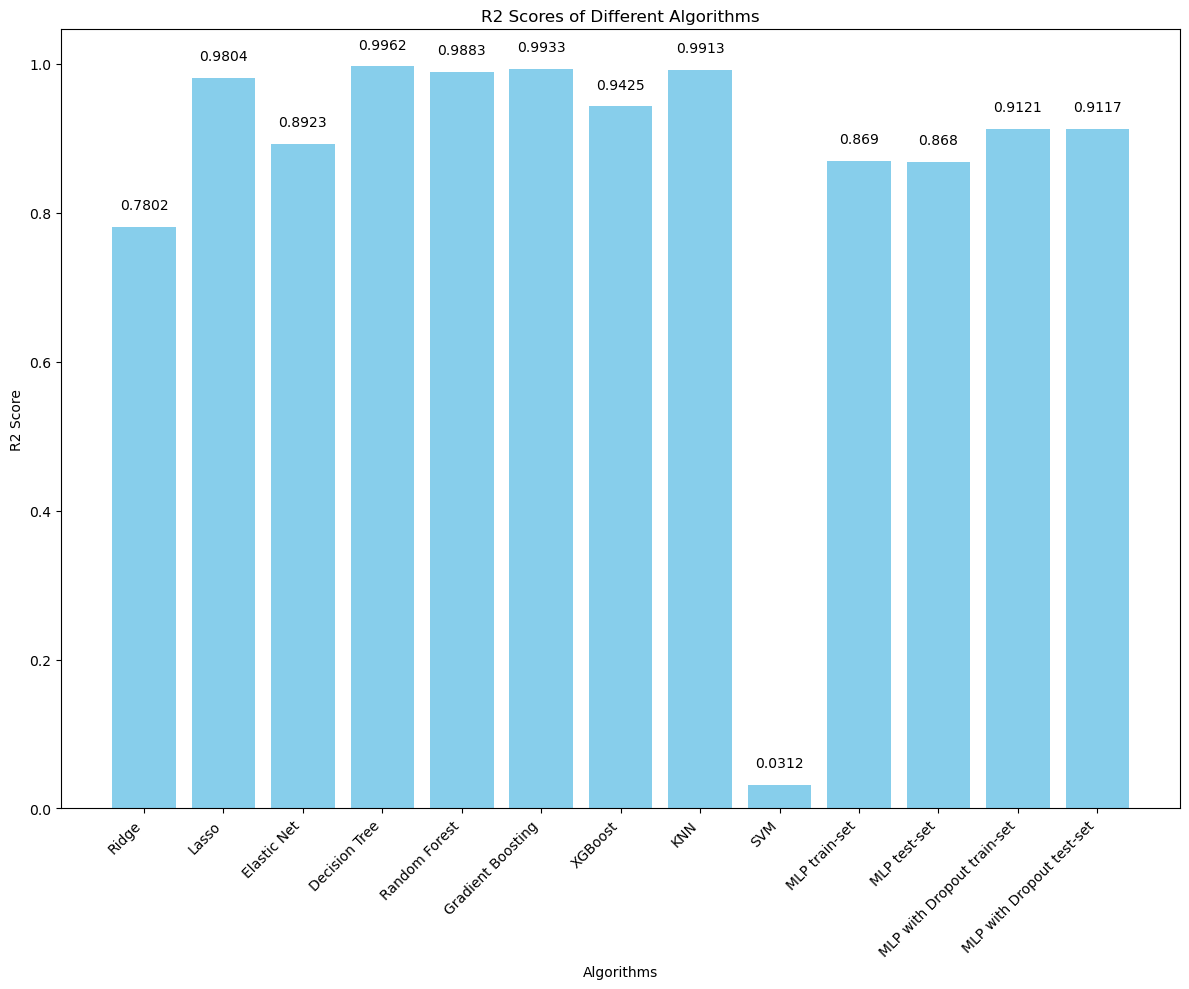

In [19]:
import matplotlib.pyplot as plt
r2_scores = {
    'Ridge':ridge_r2,
    'Lasso':lasso_r2,
    'Elastic Net':elastic_r2,
    'Decision Tree':tree_r2,
    'Random Forest':rf_r2,
    'Gradient Boosting':gbr_r2,
    'XGBoost':xgb_r2,
    'KNN':knn_r2,
    'SVM':svm_r2,
    'MLP train-set':train_r2_mlp,
    'MLP test-set':test_r2_mlp,
    'MLP with Dropout train-set':train_r2_dropout,
    'MLP with Dropout test-set':test_r2_dropout
    
}

algorithms = list(r2_scores.keys())
scores = list(r2_scores.values())

plt.figure(figsize=(12, 10))
bars = plt.bar(algorithms, scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
plt.title('R2 Scores of Different Algorithms')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('r2_scores.jpg')
plt.show()

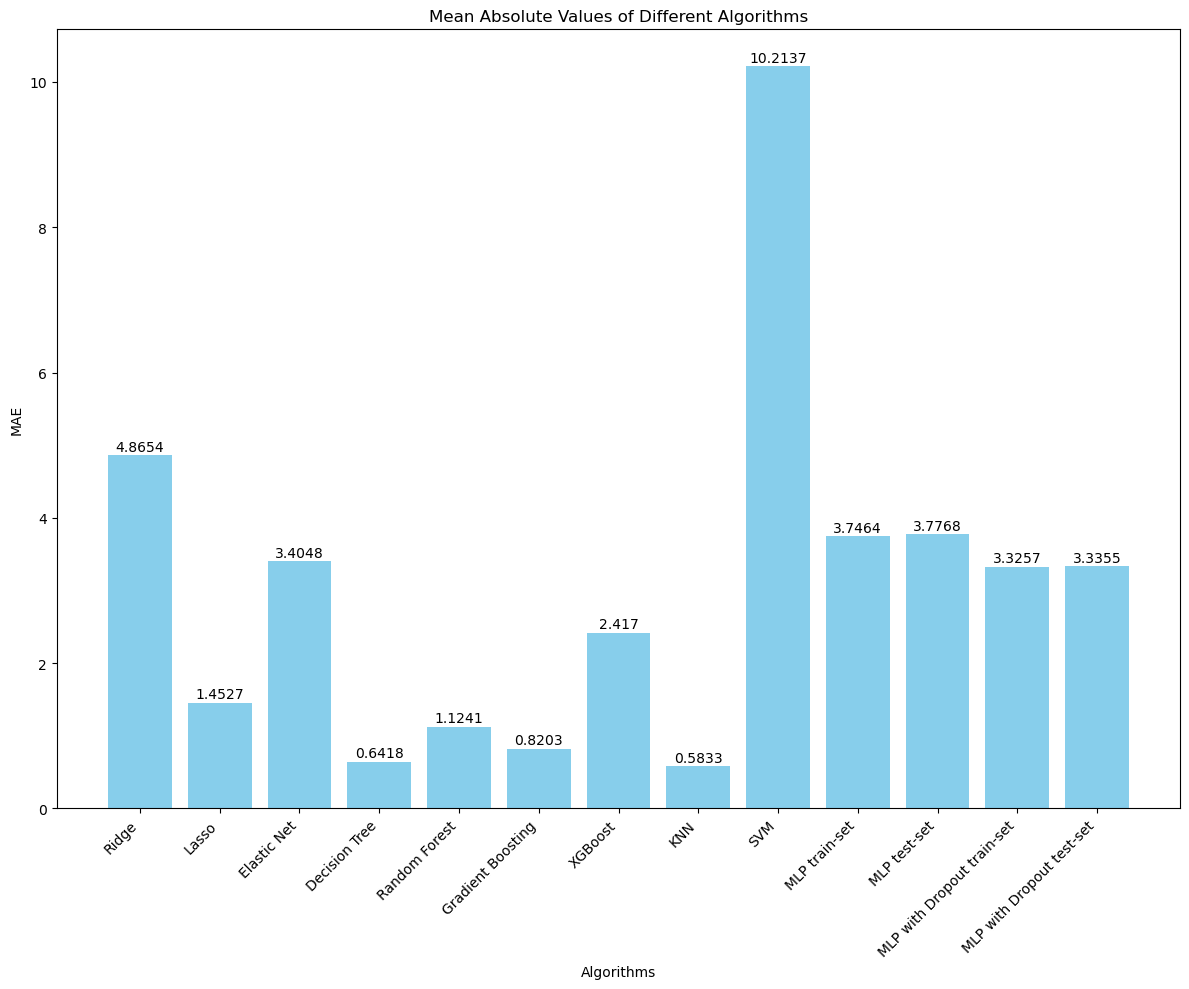

In [20]:
import matplotlib.pyplot as plt
r2_scores = {
    'Ridge':ridge_mae,
    'Lasso':lasso_mae,
    'Elastic Net':elastic_mae,
    'Decision Tree':tree_mae,
    'Random Forest':rf_mae,
    'Gradient Boosting':gbr_mae,
    'XGBoost':xgb_mae,
    'KNN':knn_mae,
    'SVM':svm_mae,
    'MLP train-set':train_mae_mlp,
    'MLP test-set':test_mae_mlp,
    'MLP with Dropout train-set':train_mae_dropout,
    'MLP with Dropout test-set':test_mae_dropout
    
}

algorithms = list(r2_scores.keys())
scores = list(r2_scores.values())

plt.figure(figsize=(12, 10))
bars = plt.bar(algorithms, scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('MAE')
plt.title('Mean Absolute Values of Different Algorithms')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('mae.jpg')
plt.show()